In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib notebook

from lowe.locations.lookup import name2fips, fips2name, search, generate_df_json
from lowe.acs.ACSClient import ACSClient

In [2]:
cities = ['cathedral city', 'coachella', 'desert hot springs', 'indian wells', 'indio', 'la quinta', 'palm desert', 'palm springs', 'rancho mirage']

In [3]:
# there is not search that returns the df?

all_loc = []

for city in cities:
    df = generate_df_json(codetype="city")
    df = df.astype(str)  # Convert all cols to string
    # df[df['A'].str.contains("hello")]
    df = df[df["name"].str.contains(city)]
    fips = df.iloc[0]['fips']
    loc = {
        "state": fips[0:2],
        "city": fips[2:]
    }
    all_loc.append(loc)

In [4]:
client = ACSClient()
await client.initialize()

In [5]:
resp = await client.get_acs(vars = ["S1901"],
                     start_year="2019",
                     end_year="2019",
                     location=all_loc,
                     estimate="5")

In [6]:
col_sub = ["INCOME IN THE PAST 12 MONTHS (IN 2019 INFLATION-ADJUSTED DOLLARS) Estimate Families Median income (dollars)",
          "state", "city"]
resp = resp[col_sub]
resp = resp.rename(columns = {
    "INCOME IN THE PAST 12 MONTHS (IN 2019 INFLATION-ADJUSTED DOLLARS) Estimate Families Median income (dollars)": "Median Income"
})

In [7]:
resp

concept_label,Median Income,state,city
year,,,
2019,55662,ca,cathedral city
2019,48399,ca,coachella
2019,40209,ca,desert hot springs
2019,29615,az,indian wells
2019,64344,ca,indio
2019,98906,ca,la quinta
2019,74207,ca,palm desert
2019,72413,ca,palm springs
2019,113390,ca,rancho mirage


<IPython.core.display.Javascript object>


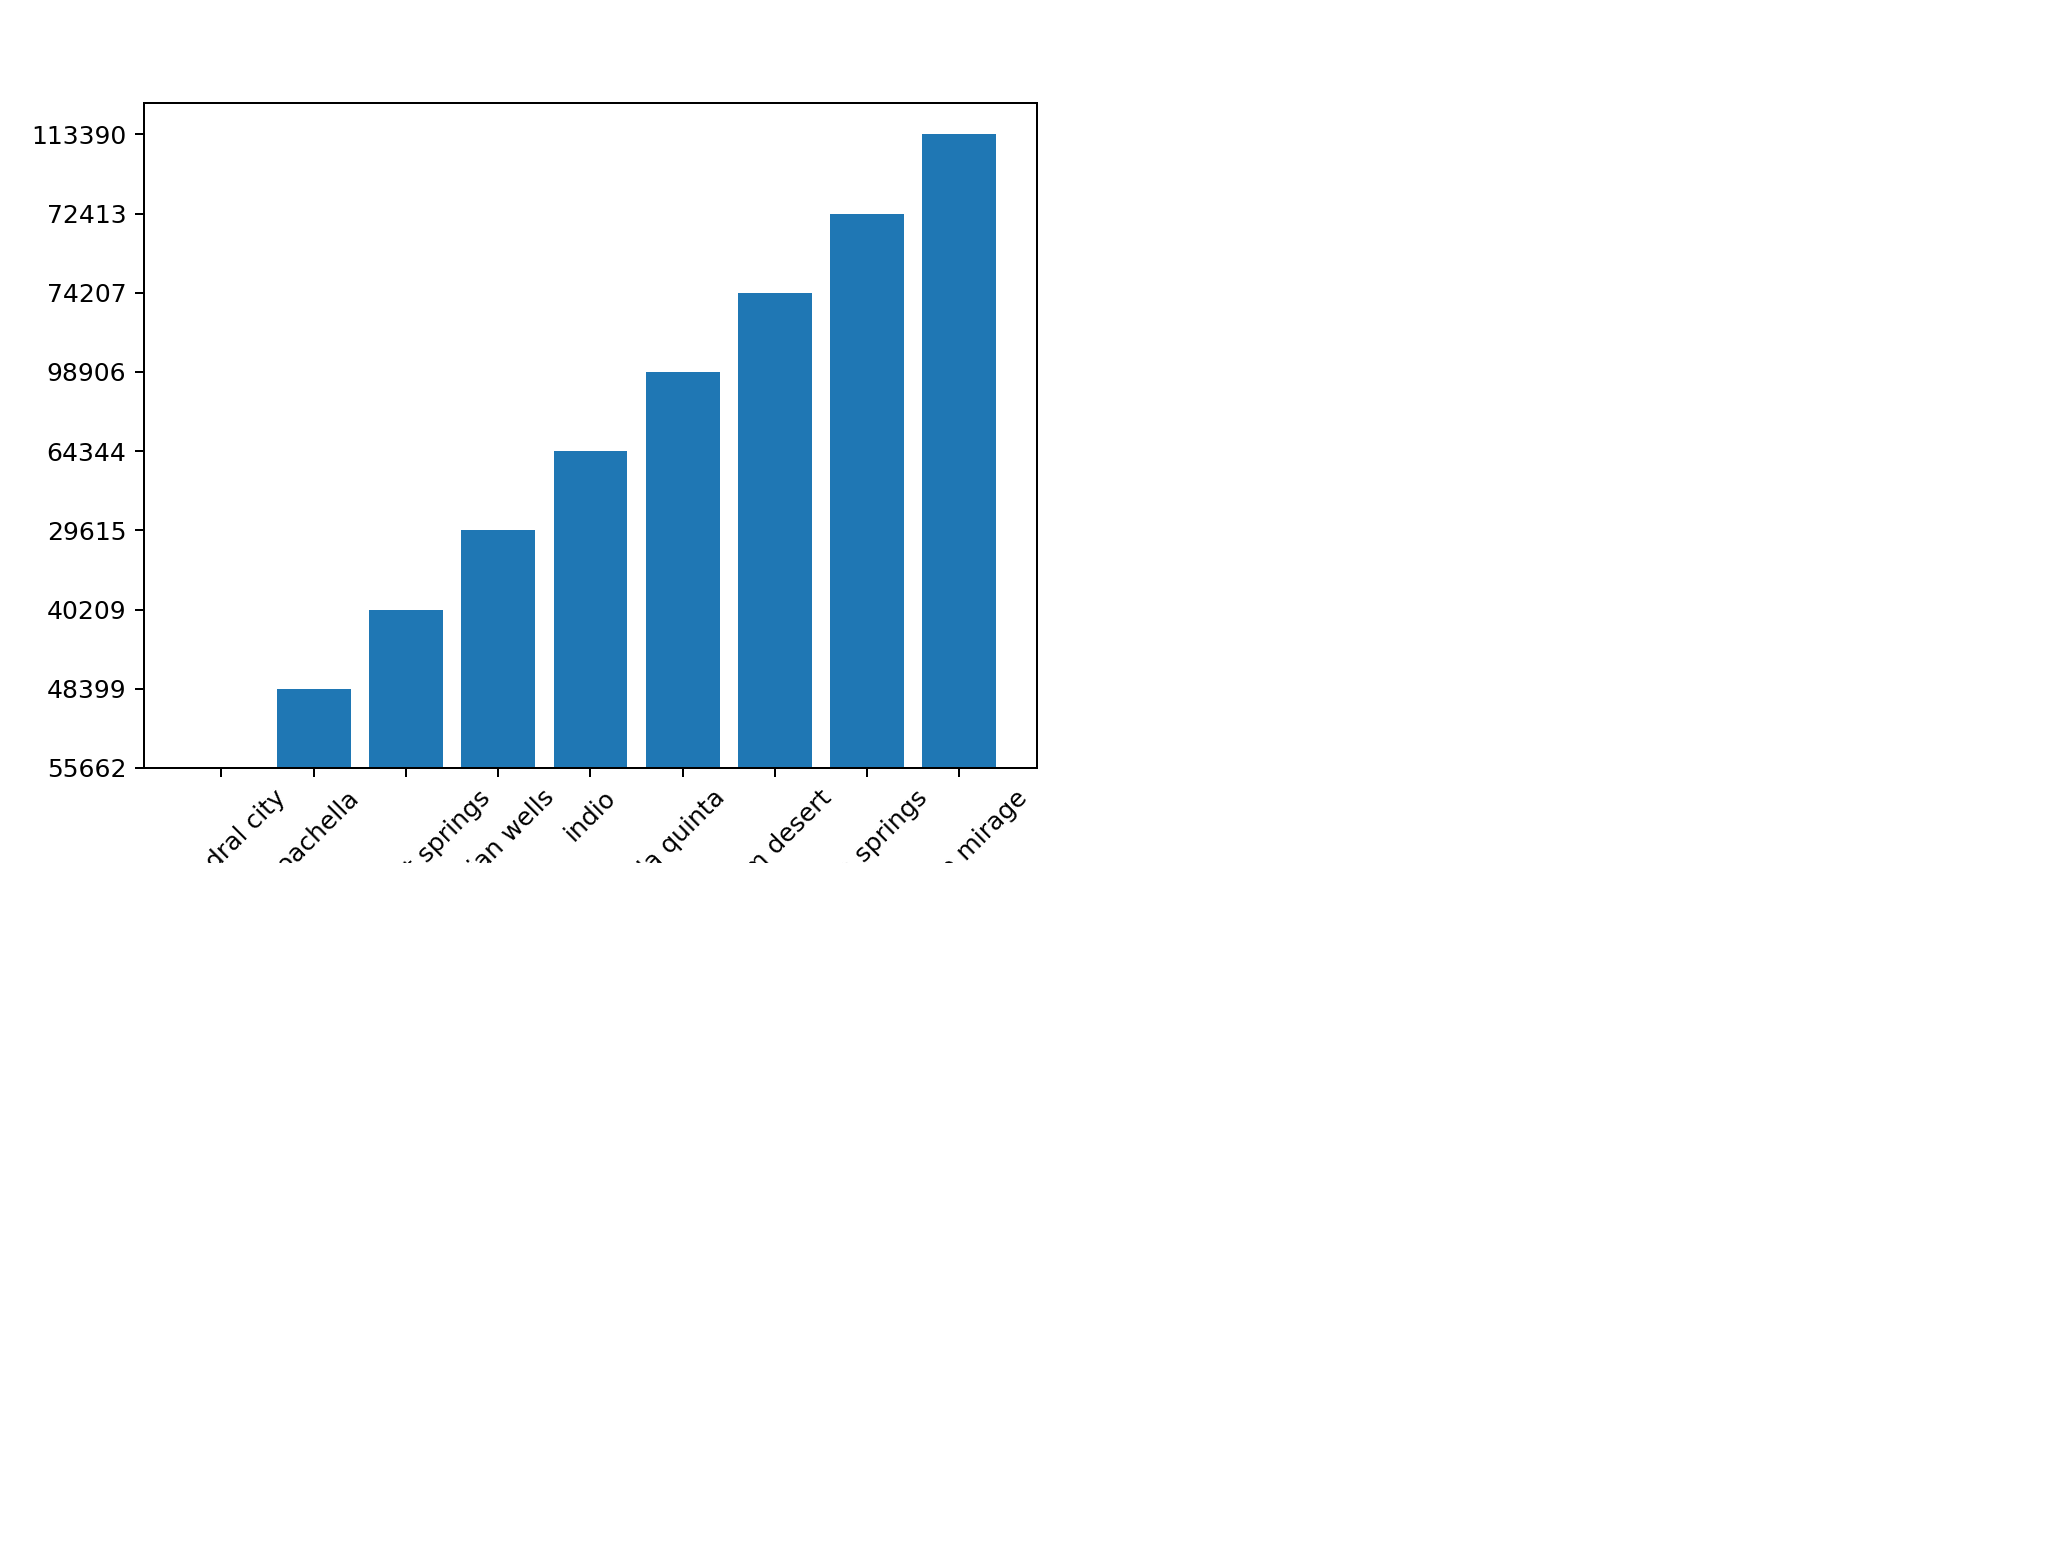

<BarContainer object of 9 artists>

In [42]:
categ = resp["city"]
value = resp["Median Income"]

plt.xticks(rotation=45)

plt.bar(categ, value)

## Scratch, One city

In [9]:
search(query = "desert hot springs", codetype = "city", search_on = "name")

                        name     fips
2400  desert hot springs, ca  0618996


In [10]:
loc = {
    "state": "06",
    "city": "18996"
}

In [11]:
namedict = fips2name(loc)
name2fips(namedict)

{'city': '0618996', 'state': '06'}

In [12]:
client = ACSClient()
await client.initialize()

Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x7f44bcd04fd0>
Unclosed connector
connections: ['[(<aiohttp.client_proto.ResponseHandler object at 0x7f447afc7320>, 28551.054900843), (<aiohttp.client_proto.ResponseHandler object at 0x7f447be01048>, 28551.274683743), (<aiohttp.client_proto.ResponseHandler object at 0x7f447afc7660>, 28551.474390343), (<aiohttp.client_proto.ResponseHandler object at 0x7f447afc7798>, 28551.645614943), (<aiohttp.client_proto.ResponseHandler object at 0x7f447afc78d0>, 28551.813165743), (<aiohttp.client_proto.ResponseHandler object at 0x7f447afc7458>, 28551.981612143), (<aiohttp.client_proto.ResponseHandler object at 0x7f447afc7118>, 28552.162561443), (<aiohttp.client_proto.ResponseHandler object at 0x7f447afc71e8>, 28552.331482743), (<aiohttp.client_proto.ResponseHandler object at 0x7f447afc7a08>, 28552.502978543)]']
connector: <aiohttp.connector.TCPConnector object at 0x7f44c0e02668>


hold off on DP05 age for now

In [13]:
temp_resp = await client.get_acs(vars = ["S1901"],
                     start_year="2019",
                     end_year="2019",
                     location=loc,
                     estimate="5")

In [14]:
for col in list(temp_resp.columns):
    print(col)

INCOME IN THE PAST 12 MONTHS (IN 2019 INFLATION-ADJUSTED DOLLARS) Estimate Families Mean income (dollars)
INCOME IN THE PAST 12 MONTHS (IN 2019 INFLATION-ADJUSTED DOLLARS) Estimate Families Median income (dollars)
INCOME IN THE PAST 12 MONTHS (IN 2019 INFLATION-ADJUSTED DOLLARS) Estimate Families PERCENT ALLOCATED Family income in the past 12 months
INCOME IN THE PAST 12 MONTHS (IN 2019 INFLATION-ADJUSTED DOLLARS) Estimate Families PERCENT ALLOCATED Household income in the past 12 months
INCOME IN THE PAST 12 MONTHS (IN 2019 INFLATION-ADJUSTED DOLLARS) Estimate Families PERCENT ALLOCATED Nonfamily income in the past 12 months
INCOME IN THE PAST 12 MONTHS (IN 2019 INFLATION-ADJUSTED DOLLARS) Estimate Families Total
INCOME IN THE PAST 12 MONTHS (IN 2019 INFLATION-ADJUSTED DOLLARS) Estimate Families Total $10,000 to $14,999
INCOME IN THE PAST 12 MONTHS (IN 2019 INFLATION-ADJUSTED DOLLARS) Estimate Families Total $100,000 to $149,999
INCOME IN THE PAST 12 MONTHS (IN 2019 INFLATION-ADJUSTED

In [15]:
temp_resp.shape #10 yeras, 173 different attributes, 

(1, 67)

In [16]:
col_sub = ["INCOME IN THE PAST 12 MONTHS (IN 2019 INFLATION-ADJUSTED DOLLARS) Estimate Families Median income (dollars)",
          "state", "city"]
temp_resp = temp_resp[col_sub]
temp_resp = temp_resp.rename(columns = {
    "INCOME IN THE PAST 12 MONTHS (IN 2019 INFLATION-ADJUSTED DOLLARS) Estimate Families Median income (dollars)": "Median Income"
})

In [17]:
temp_resp

concept_label,Median Income,state,city
year,,,
2019,40209,ca,desert hot springs
